In [33]:
from WholeImageDataset import WholeImageDataset
import matching_cost
import numpy as np
import matplotlib.pyplot as plt
import torch

In [34]:
def extract_patch(image, row, col, patch_dim=(9, 9)):
    row_from = row - patch_dim[0] // 2
    row_to = row_from + patch_dim[0]
    col_from = col - patch_dim[1] // 2
    col_to = col_from + patch_dim[1]
    return torch.tensor(image[row_from:row_to, col_from:col_to, :])

In [6]:
images_dataset = WholeImageDataset()

In [71]:
left, right, disp_0 = images_dataset[0]

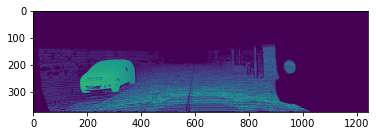

In [77]:
plt.imshow(disp_0)

In [60]:
disp_map = np.zeros(shape=(left.shape[0], left.shape[1]), dtype="uint8")

In [63]:
disp_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [62]:
left.shape[0] - 4

371

In [80]:
for row in range(4, left.shape[0]-4):
    for col in range(4 + 64, left.shape[1] - 4):
        costs_for_disparities_at_pixel = np.zeros(shape=(64))
        reference_patch = extract_patch(left, row, col)
        for disp in range(0, 64):
            patch_at_disp = extract_patch(right, row, col - disp)

            cost_at_row_col_disp = matching_cost.sum_of_absolute_differences(reference_patch, patch_at_disp)
            costs_for_disparities_at_pixel[disp] = cost_at_row_col_disp

        disp_map[row, col] = np.argmin(costs_for_disparities_at_pixel)

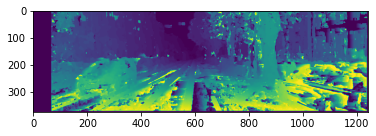

In [86]:
plt.imshow(disp_map)

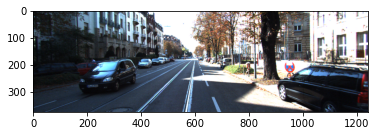

In [88]:
plt.imshow(left)

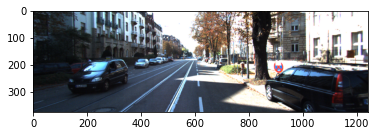

In [89]:
plt.imshow(right)

In [90]:
from PatchesDataset import PatchesDataset

patches_dataset = PatchesDataset()


In [96]:
patch_0 = patches_dataset[0]
print(left.shape)
print(disp_0.shape)

(375, 1242, 3)
(375, 1242)
